In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [48]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [49]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[1:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]

In [50]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [51]:
X_train[:, 0].shape

(784,)

In [52]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0
    
def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [53]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size
    
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i % 10 == 0):
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [54]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
Accuracy:  0.09348780487804878
Iteration:  10
Accuracy:  0.10960975609756098


/tmp/ipykernel_35/3080173683.py:12: RuntimeWarning: invalid value encountered in divide
  return np.exp(Z) / np.sum(np.exp(Z))
/tmp/ipykernel_35/3080173683.py:28: RuntimeWarning: invalid value encountered in greater
  return Z > 0


Iteration:  20
Accuracy:  0.09802439024390244
Iteration:  30
Accuracy:  0.09802439024390244
Iteration:  40
Accuracy:  0.09802439024390244
Iteration:  50
Accuracy:  0.09802439024390244
Iteration:  60
Accuracy:  0.09802439024390244
Iteration:  70
Accuracy:  0.09802439024390244
Iteration:  80
Accuracy:  0.09802439024390244
Iteration:  90
Accuracy:  0.09802439024390244
Iteration:  100
Accuracy:  0.09802439024390244
Iteration:  110
Accuracy:  0.09802439024390244
Iteration:  120
Accuracy:  0.09802439024390244
Iteration:  130
Accuracy:  0.09802439024390244
Iteration:  140
Accuracy:  0.09802439024390244
Iteration:  150
Accuracy:  0.09802439024390244
Iteration:  160
Accuracy:  0.09802439024390244
Iteration:  170
Accuracy:  0.09802439024390244
Iteration:  180
Accuracy:  0.09802439024390244
Iteration:  190
Accuracy:  0.09802439024390244
Iteration:  200
Accuracy:  0.09802439024390244
Iteration:  210
Accuracy:  0.09802439024390244
Iteration:  220
Accuracy:  0.09802439024390244
Iteration:  230
Accur

In [55]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = np.argmax(A2, 0)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  8


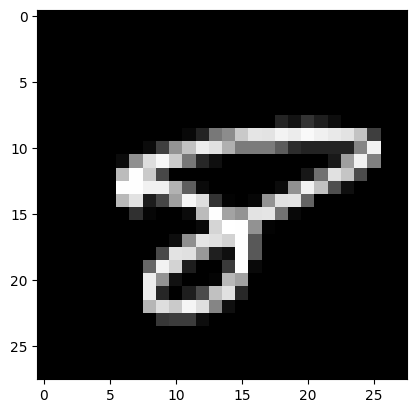

In [56]:
test_prediction(78, W1, b1, W2, b2)

Prediction:  [0]
Label:  5


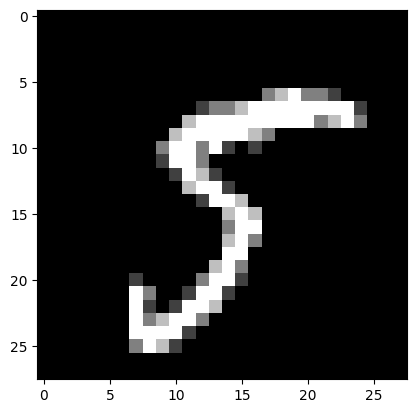

In [57]:
test_prediction(108, W1, b1, W2, b2)

An accuracy hovering around 0.09 (which is close to random guessing for 10 classes, 1/10 = 0.1) indicates that your neural network is not learning effectively.

Potential Issues:

Learning Rate (alpha): Your learning rate is set to 0.1. This might be too high, causing the optimization to overshoot the minima. Try reducing it significantly (e.g., 0.01, 0.001, 0.0001).

Initialization of Parameters: Initializing weights with np.random.rand() - 0.5 (resulting in values between -0.5 and 0.5) and biases similarly. While this can work for small networks, for deeper networks or with certain activation functions, other initialization strategies might be better (e.g., Xavier/Glorot initialization or He initialization). However, for a simple two-layer network with ReLU, this initialization is likely not the primary cause of such low accuracy.

Softmax Numerical Instability: Although didn't get the RuntimeWarning this time, the lack of numerical stability in your softmax function (as discussed in the previous turn) can sometimes lead to issues during training, especially if Z2 contains very large positive or negative values. It's still recommended to implement the stabilization trick.

Derivative of ReLU: deriv_ReLU(Z) function returns a boolean array (True where Z > 0, False otherwise). While NumPy can often handle this in calculations, it's better practice to return a numerical array (1 where Z > 0, 0 otherwise).

Bias Gradient Calculation: In back_prop function, calculating the bias gradients as db2 = 1 / m * np.sum(dZ2) and db1 = 1 / m * np.sum(dZ1). As discussed before, for a multi-neuron layer, need to sum along the examples (axis=1) and keep the dimensions for proper broadcasting.

Data Preprocessing: dividing your pixel values by 255. This is good for normalization.

Network Architecture: network has an input layer (784), one hidden layer (10 neurons), and an output layer (10 neurons). A hidden layer with only 10 neurons might be too small to learn the complex patterns in the MNIST dataset. Consider increasing the number of neurons in the hidden layer (e.g., 50, 100, or more).

Number of Iterations: training for 500 iterations. This might not be enough for the network to converge, especially if the learning rate or network architecture is not optimal. Try increasing the number of iterations.

Iteration: 0
Accuracy: 0.09141463414634146
Iteration: 10
Accuracy: 0.12348780487804878
Iteration: 20
Accuracy: 0.1541219512195122
Iteration: 30
Accuracy: 0.18726829268292683
Iteration: 40
Accuracy: 0.2211219512195122
Iteration: 50
Accuracy: 0.2551707317073171
Iteration: 60
Accuracy: 0.28685365853658534
Iteration: 70
Accuracy: 0.3164390243902439
Iteration: 80
Accuracy: 0.3434878048780488
Iteration: 90
Accuracy: 0.36853658536585365
Iteration: 100
Accuracy: 0.39214634146341465
Iteration: 110
Accuracy: 0.4125609756097561
Iteration: 120
Accuracy: 0.4322682926829268
Iteration: 130
Accuracy: 0.450609756097561
Iteration: 140
Accuracy: 0.46746341463414637
Iteration: 150
Accuracy: 0.4829512195121951
Iteration: 160
Accuracy: 0.4978292682926829
Iteration: 170
Accuracy: 0.5123414634146342
Iteration: 180
Accuracy: 0.5261707317073171
Iteration: 190
Accuracy: 0.5388048780487805
Iteration: 200
Accuracy: 0.5505365853658537
Iteration: 210
Accuracy: 0.5613902439024391
Iteration: 220
Accuracy: 0.5719268292

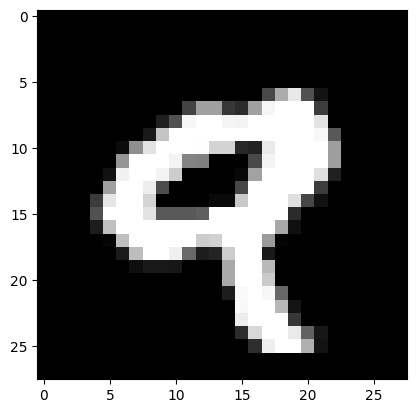

Prediction:  [0]
Label:  0


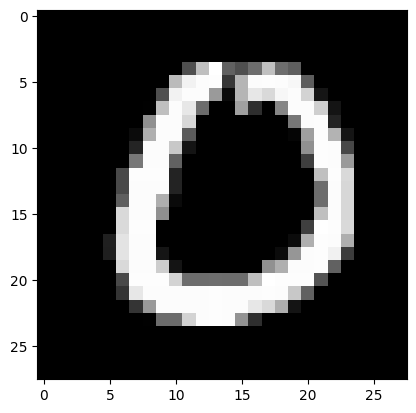

In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load and preprocess data (same as before)
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv').to_numpy()
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n] / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n] / 255.
_, m_train = X_train.shape

def init_params(n_h=50):  # Increased hidden layer size
    W1 = np.random.rand(n_h, 784) - 0.5
    b1 = np.random.rand(n_h, 1) - 0.5
    W2 = np.random.rand(10, n_h) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    shiftz = Z - np.max(Z, axis=0, keepdims=True)
    return np.exp(shiftz) / np.sum(np.exp(shiftz), axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return (Z > 0).astype(int)  # Returns 1 for True, 0 for False

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)  # Corrected bias gradient
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)  # Corrected bias gradient
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha, n_h=50):  # Added n_h as argument
    W1, b1, W2, b2 = init_params(n_h)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i % 10 == 0):
            accuracy = get_accuracy(get_predictions(A2), Y)
            print(f"Iteration: {i}")
            print(f"Accuracy: {accuracy}")
    return W1, b1, W2, b2

# Train the model with adjustments
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.01, n_h=50) # Reduced alpha, increased n_h

# Test predictions (same as before)
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = np.argmax(A2, 0)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

test_prediction(78, W1, b1, W2, b2)
test_prediction(108, W1, b1, W2, b2)